In [3]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [5]:
df= pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


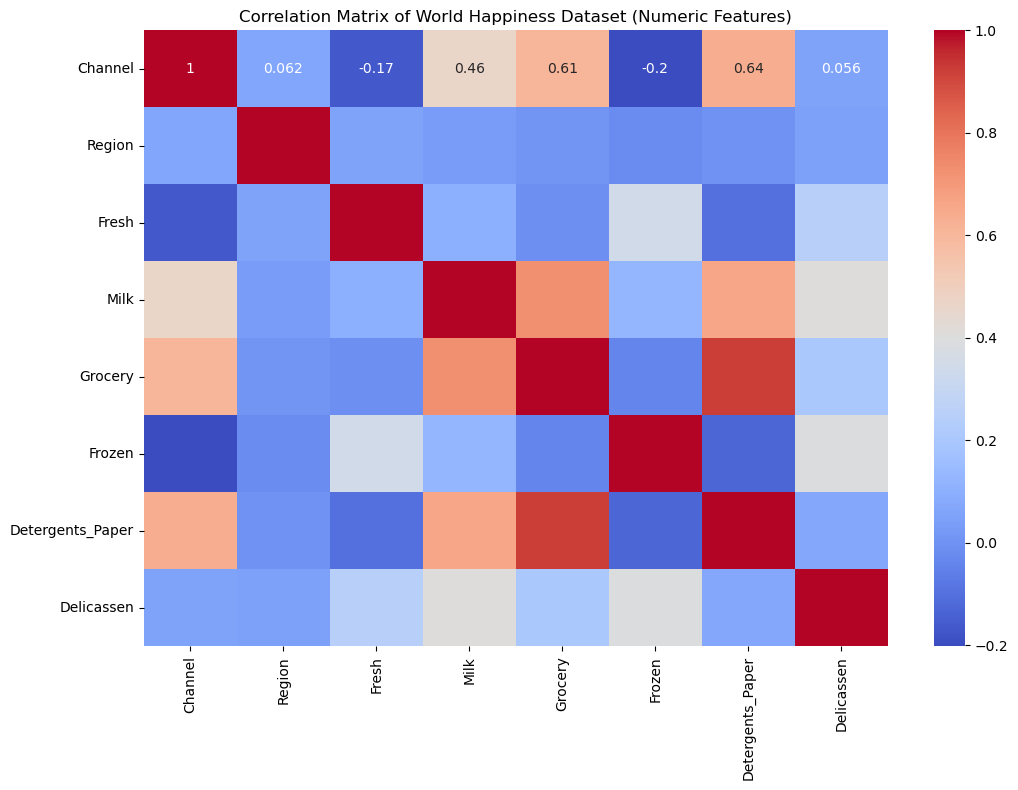

In [10]:
#Seleccion de columnas numericas para el analisis descriptivo 
numeric_df = df.select_dtypes(include=np.number)
#Estadistica descriptiva 
numeric_df.describe
#Matriz de correlacion 
matriz_correlacion = numeric_df.corr()
#Mapa de calor 
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of World Happiness Dataset (Numeric Features)')
plt.show()

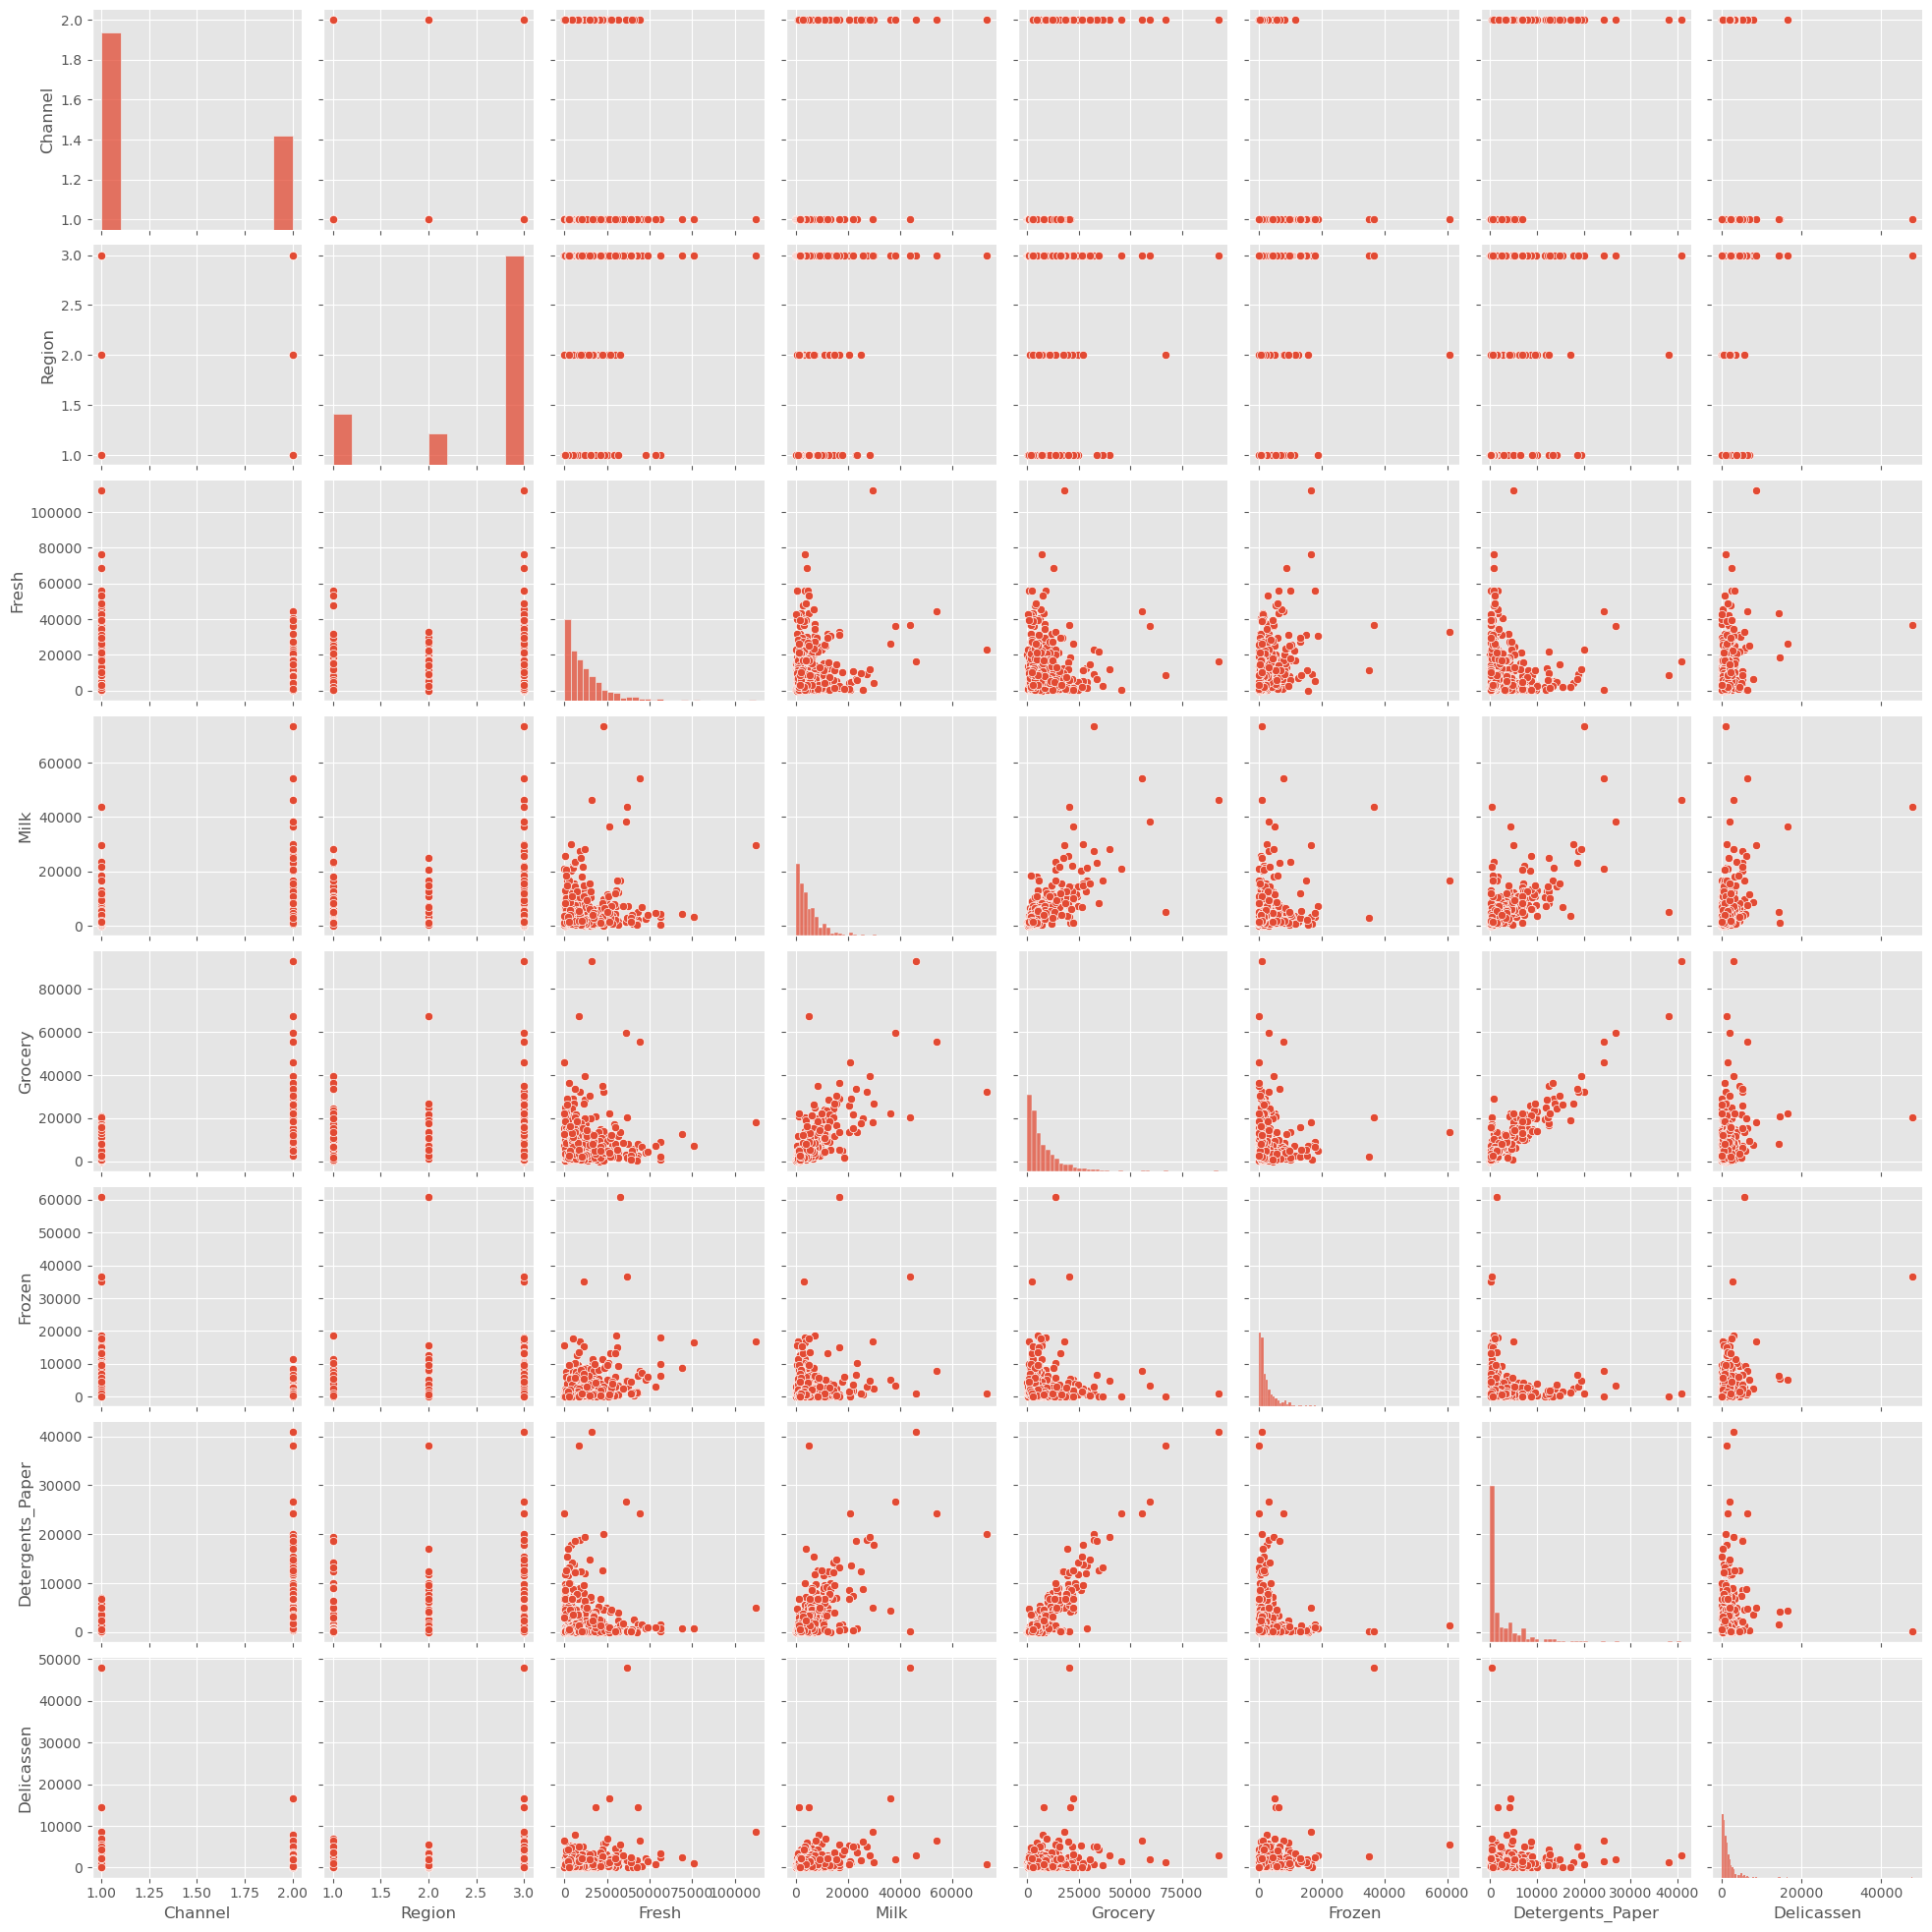

In [19]:
# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(df)
plt.show()

In [20]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

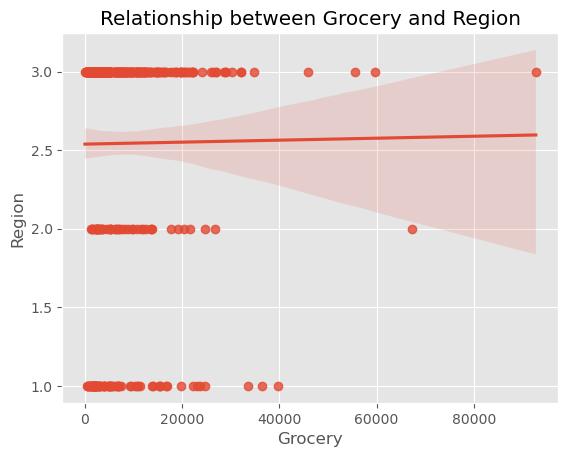

In [21]:
# Análisis de regresión
sns.regplot(x = 'Grocery', y = 'Region', data = df)
plt.title('Relationship between Grocery and Region')
plt.show()

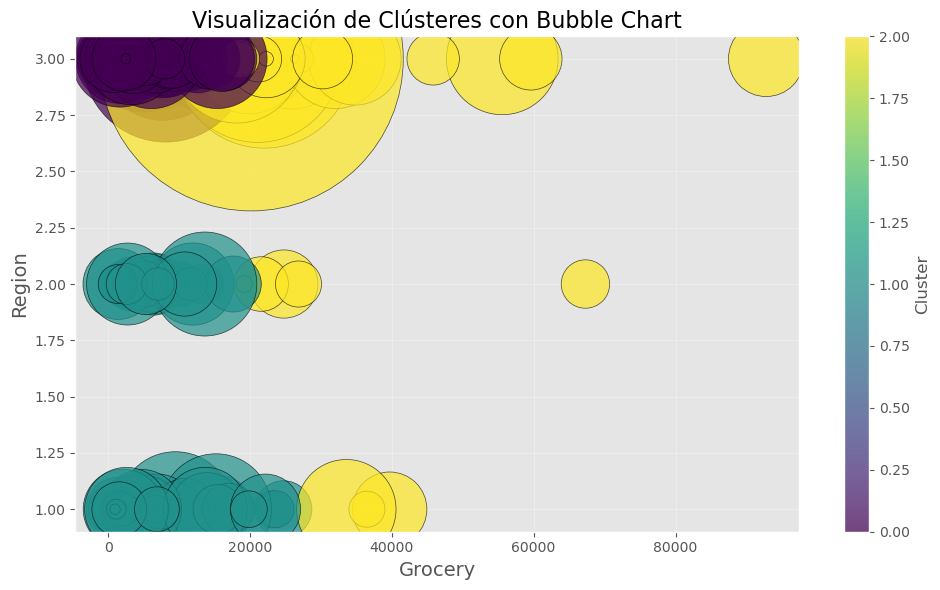

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df[['Grocery', 'Region']])

# Aplicar K-Means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(x)

# Bubble Chart para visualizar los clústeres
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Grocery'], df['Region'], 
    s=df['Delicassen'],  # Tamaño de las burbujas
    c=df['Cluster'],     # Color según el clúster
    cmap='viridis', 
    alpha=0.7, 
    edgecolors='k'
)

# Agregar etiquetas
plt.title('Visualización de Clústeres con Bubble Chart', fontsize=16)
plt.xlabel('Grocery', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()